In [ ]:
import sys
import pandas as pd
import numpy as np
!pip install mne
import mne
import matplotlib.pyplot as plt
from copy import deepcopy
import math
import time as t
from operator import itemgetter

#print full np arrays
#np.set_printoptions(threshold=sys.maxsize)


In [ ]:
'''
  # plot time domain eeg data in a loop
  # @args:
  ## data: MNE raw data to be printed
  ## timeStart: the timestamp to start printing eeg data from
  ## timeMax: the final timestamp to stop printing eeg data at
  ## timeItr: eeg data window size for printing
  ## keepChannels: channels to keep, default: keep all channels
'''
def plotLoop(data, timeStart, timeMax, timeItr, keepChannels = None) :
  dataInternal = deepcopy(data)
  if (keepChannels != None) :
    print(keepChannels)
    dataInternal.pick_channels(keepChannels)
  time = timeStart
  while (time < timeMax):
    timestr = "time: from " + str(math.floor(((time) / 60))) + ":" + str(time % 60) + " min until " + str(math.floor(((time + timeItr) / 60))) + ":" + str((time + timeItr) % 60) + " min"
    print(timestr)
    dataInternal.plot(start=time, duration=timeItr, scalings='auto')
    time = time + timeItr





In [ ]:
'''
  # plot psd frequency domain eeg data in a loop
  # @args:
  ## data: MNE raw data to be printed
  ## timeStart: the timestamp to start printing eeg data from
  ## timeMax: the final timestamp to stop printing eeg data at
  ## timeSplit: eeg data window size for printing
  ## badChannels: channels to remove, default: keep all channels
'''
def psdLoop(data, startTime, maxTime, timeSplit, badChannels = None):
  time = startTime
  while (time < maxTime):
    timestr = str(math.floor(((time) / 60))) + ":" + str(time % 60) + " min until " + str(math.floor(((time + timeSplit) / 60))) + ":" + str((time + timeSplit) % 60) + " min"
    print(timestr)
    data.compute_psd(fmin=0.1, fmax=80, tmin = time, tmax = time + timeSplit, exclude = badChannels).plot()
    time = time + timeSplit

In [ ]:
from pprint import pprint
pd.set_option('display.max_colwidth',1000)
df = pd.read_csv("/content/Dara_2_17_15_T1_S1.csv", delimiter='\t')
pprint(df, width=1000)

       0.000000    0.000000.1    0.000000.2    0.000000.3    0.000000.4  \
0           1.0 -15326.881746 -15605.563296  10101.066244  18690.439307   
1           2.0 -15324.713626 -15602.456403  10093.801927  18693.635606   
2           3.0 -15323.037246 -15599.863601  10092.997264  18694.753193   
3           4.0 -15320.936182 -15598.477793  10090.985607  18695.401394   
4           5.0 -15320.198574 -15597.829592  10095.835936  18697.368347   
...         ...           ...           ...           ...           ...   
78128      73.0     -0.581145  -7815.622725   7182.621322  22011.930884   
78129      74.0      5.722047  -7809.163071   7190.533840  22018.234076   
78130      75.0      4.313887  -7809.945382   7193.640732  22017.004730   
78131      76.0      6.459654  -7809.140719   7186.287008  22016.714158   
78132      77.0      6.660820  -7809.207774   7176.675758   2201.000000   

         0.000000.5    0.000000.6   0.000000.7    0.000000.8  0.000000.9  ...  \
0     -27140.20337

Creating RawArray with float64 data, n_channels=23, n_times=24281
    Range : 0 ... 24280 =      0.000 ...    97.120 secs
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
<Info | 7 non-empty values
 bads: []
 ch_names: Channel 1, Channel 2, Channel 3, Channel 4, Channel 5, Channel ...
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz

<ipython-input-11-b887e4ccd715>:33: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psdRaw.compute_psd(fmin=2, fmax=80).plot(); #base plot
<ipython-input-11-b887e4ccd715>:35: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psdRaw.compute_psd(fmin=2, fmax=80, exclude = badChannels2).plot() #exclude bad channels


Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
psdCompute:
<Power Spectrum (from Raw, welch method) | 7 channels × 197 freqs, 8.1-32.0 Hz>
psdA:
<Power Spectrum (from Raw, welch method) | 7 channels × 41 freqs, 8.1-12.9 Hz>
freqCounter: 287
avg: 4.865787961100482
psdB:
<Power Spectrum (from Raw, welch method) | 7 channels × 156 freqs, 13.1-32.0 Hz>
freqCounter: 1092
avg: 1.077291151732556


<ipython-input-11-b887e4ccd715>:38: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psdRaw.compute_psd(fmin=2, fmax=80, exclude = badChannels2).plot() #filter electric noise
<ipython-input-11-b887e4ccd715>:41: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psdA.plot()
<ipython-input-11-b887e4ccd715>:43: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psdB.plot()
<ipython-input-11-b887e4ccd715>:46: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psdCompute.plot()


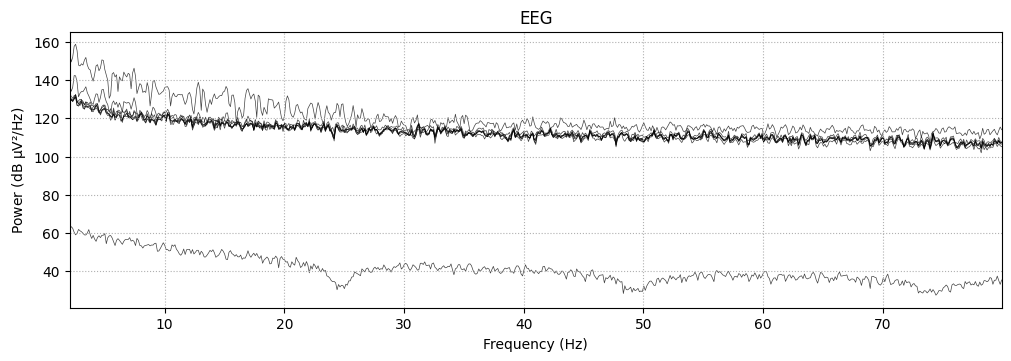

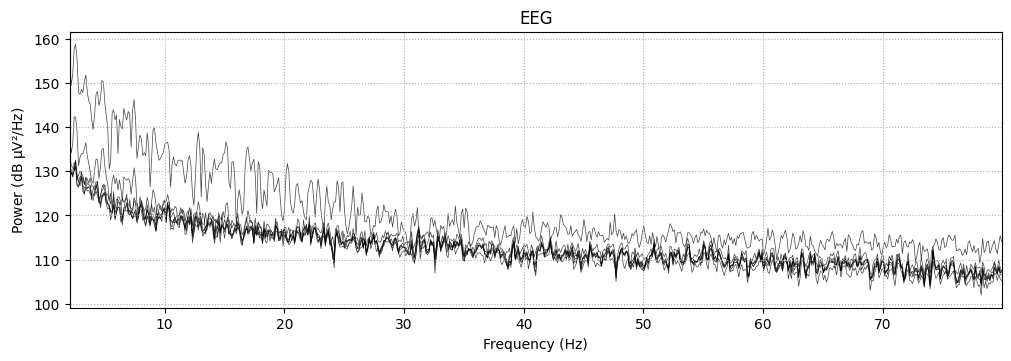

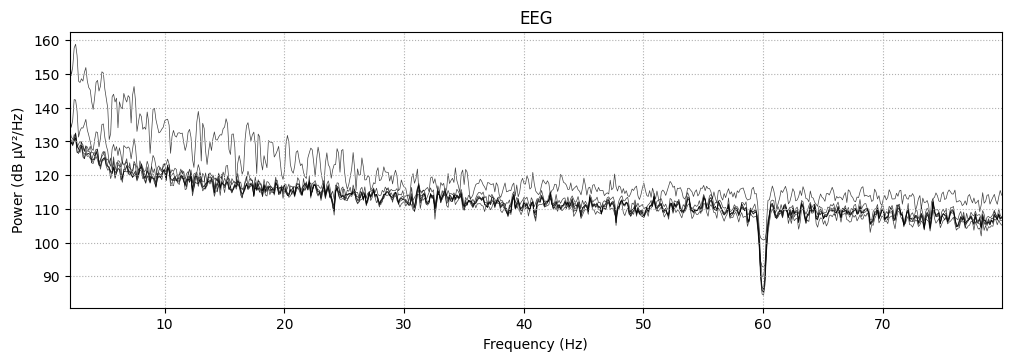

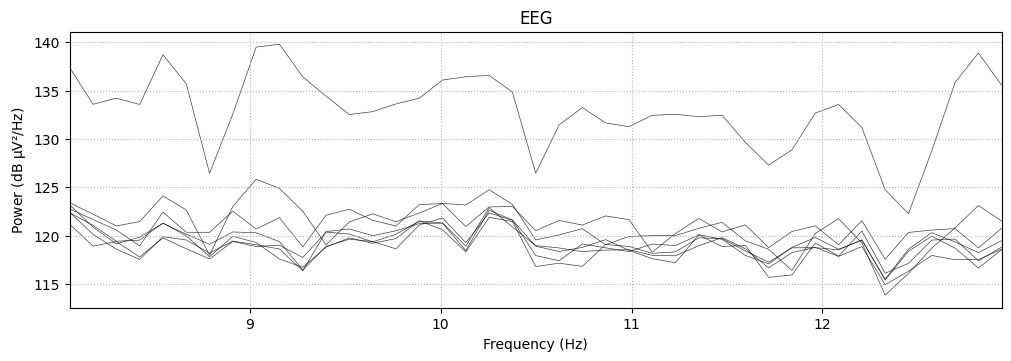

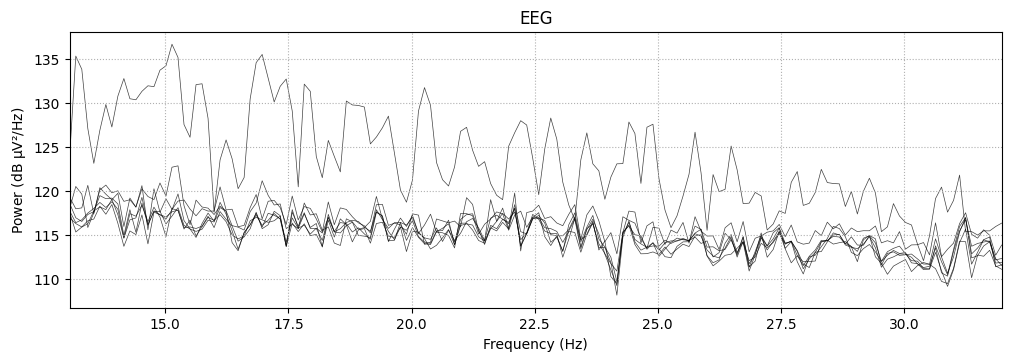

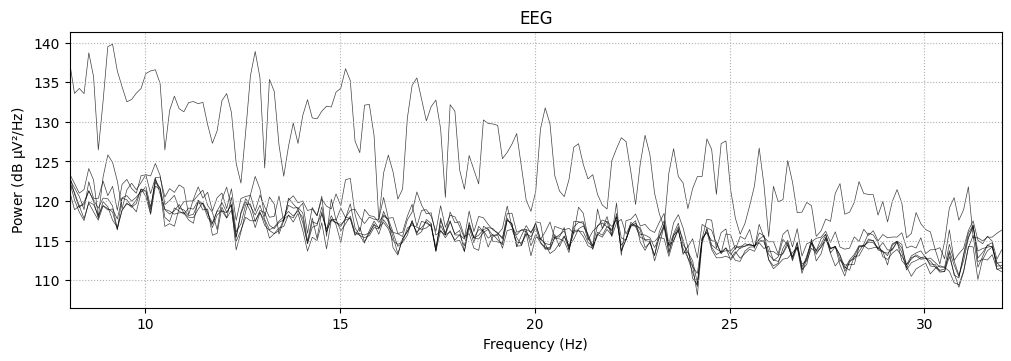

In [ ]:
#doing psd average analysis
#first data setup

first_text_file_path = '/content/Dara_2_17_25_T1_S1.txt'

df = pd.read_csv(first_text_file_path, delimiter=',', skiprows=5)

# Extract EEG data
trial_data = df.iloc[:, 1:24].values

#set up arguments
sfreq = 250  # sample rate in Hz
ch_names = ['Channel {}'.format(i) for i in range(trial_data.shape[1])]
ch_types = ['eeg' for i in range(trial_data.shape[1])]

# Create info structures and RawArray objects for each set of data
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(trial_data.T, info)

#setup channel names to keep
ch_names = [raw.ch_names]
first_ch_names_to_keep = [ch_names[0][1:9]]
raw = raw.pick_channels(first_ch_names_to_keep[0])

#raw.plot(start = 0, duration = 600, scalings='auto')
print(raw.info)

#setup bad channels
badChannels2 = first_ch_names_to_keep[0][7].split("-")

#make psds
psdRaw = deepcopy(raw)
psdRaw.compute_psd(fmin=2, fmax=80).plot(); #base plot

psdRaw.compute_psd(fmin=2, fmax=80, exclude = badChannels2).plot() #exclude bad channels

psdRaw.notch_filter(60)
psdRaw.compute_psd(fmin=2, fmax=80, exclude = badChannels2).plot() #filter electric noise

psdA = psdRaw.compute_psd(fmin=8, fmax=13, exclude = badChannels2) #filter alpha
psdA.plot()
psdB = psdRaw.compute_psd(fmin=13, fmax=32, exclude = badChannels2) #filter beta
psdB.plot()

psdCompute = psdRaw.compute_psd(fmin=8, fmax=32, exclude = badChannels2) #filter alpha+beta
psdCompute.plot()


print("psdCompute:")
print(psdCompute)

print("psdA:")
print(psdA)

#calculate the average psd signal power
psdAvg = 0
freqCounter = 0
chanCounter = 0
for channel in psdA.data:
  chanCounter = chanCounter + 1
  for freq in channel:
    freqCounter = freqCounter + 1
    psdAvg = freq + psdAvg
  #print("chanCounter: " + str(chanCounter))

psdAvg = psdAvg / freqCounter
print("freqCounter: " + str(freqCounter))
print("avg: " + str(psdAvg))

print("psdB:")
print(psdB)

#calculate the average psd signal power
psdAvg = 0
freqCounter = 0
for freq in psdB.data:
  for channelAvg in freq:
    freqCounter = freqCounter + 1
    psdAvg = channelAvg + psdAvg
psdAvg = psdAvg / freqCounter
print("freqCounter: " + str(freqCounter))
print("avg: " + str(psdAvg))




In [ ]:

#second data setup for corr analysis

second_text_file_path = '/content/JustinFocused1.txt'

df2 = pd.read_csv(second_text_file_path, delimiter=',', skiprows=5)

# Extract EEG data
trial_data2 = df2.iloc[:, 1:24].values


sfreq = 250  # sample rate in Hz
ch_names = ['Channel {}'.format(i) for i in range(trial_data2.shape[1])]
ch_types = ['eeg' for i in range(trial_data2.shape[1])]

# Create info structures and RawArray objects for each set of data
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw2 = mne.io.RawArray(trial_data2.T, info)

ch_names = [raw2.ch_names]
second_ch_names_to_keep = [ch_names[0][1:9]]
raw2 = raw2.pick_channels(second_ch_names_to_keep[0])

#setup bad channels
badChannels2 = second_ch_names_to_keep[0][1].split("-")
badChannels2 += second_ch_names_to_keep[0][0].split("-")
badChannels2 += second_ch_names_to_keep[0][4].split("-")

#make psds
psdRaw2 = deepcopy(raw2)
psdRaw2.compute_psd(fmin=2, fmax=80).plot(); #base plot

psdRaw2.compute_psd(fmin=2, fmax=80, exclude = badChannels2).plot() #exclude bad channels

psdRaw2.notch_filter(60)
psdRaw2.compute_psd(fmin=2, fmax=80, exclude = badChannels2).plot() #filter electric noise

psdA2 = psdRaw2.compute_psd(fmin=8, fmax=13, exclude = badChannels2) #filter alpha
psdB2 = psdRaw2.compute_psd(fmin=13, fmax=32, exclude = badChannels2) #filter beta

psdCompute2 = psdRaw2.compute_psd(fmin=8, fmax=32, exclude = badChannels2) #filter alpha+beta

print("psdCompute2:")
print(psdCompute2)

print("psdA2:")
print(psdA2)

#calculate the average psd signal power
psdAvg2 = 0
freqCounter = 0
chanCounter = 0
for channel in psdA2.data:
  chanCounter = chanCounter + 1
  for freq in channel:
    freqCounter = freqCounter + 1
    psdAvg2 = freq + psdAvg2
  #print("chanCounter: " + str(chanCounter))

psdAvg2 = psdAvg2 / freqCounter
print("freqCounter: " + str(freqCounter))
print("avg2: " + str(psdAvg2))

print("psdB2:")
print(psdB2)

#calculate the average psd signal power
psdAvg2 = 0
freqCounter = 0
for freq in psdB2.data:
  for channelAvg in freq:
    freqCounter = freqCounter + 1
    psdAvg2 = channelAvg + psdAvg2
psdAvg2 = psdAvg2 / freqCounter
print("freqCounter: " + str(freqCounter))
print("avg2: " + str(psdAvg2))

In [ ]:
#correlation analysis to see if there is a difference between focused and unfocused signals

print(psdB.data.size)
print(psdB2.data.size)
print(psdB.data)
print(psdB.data.size / psdB.data[0].size)
print(psdB.data[0].size)

chanNum = 5

# beta focused vs unfocused

correlTot = 0
print("\n\ncorrelation tests:\n")
print("beta focused vs unfocused\n")
for channel in range(chanNum):
  correlation = 0
  for index in range(psdB.data[0].size):
    correlation = correlation + (psdB.data[channel][index] * psdB2.data[channel][index])
  print(correlation)
  correlTot = correlTot + correlation
print("Total Correlation: " + str(correlTot))

# beta focused vs focused

correlTot = 0
print("\nbeta focused vs focused\n")
for channel in range(chanNum):
  correlation = 0
  for index in range(psdB.data[0].size):
    correlation = correlation + (psdB.data[channel][index] * psdB.data[channel][index])
  print(correlation)
  correlTot = correlTot + correlation
print("Total Correlation: " + str(correlTot))

# beta unfocused vs unfocused

correlTot = 0
print("\nbeta unfocused vs unfocused\n")
for channel in range(chanNum):
  correlation = 0
  for index in range(psdB.data[0].size):
    correlation = correlation + (psdB2.data[channel][index] * psdB2.data[channel][index])
  print(correlation)
  correlTot = correlTot + correlation
print("Total Correlation: " + str(correlTot))

# alpha focused vs unfocused

correlTot = 0
print("\nalpha focused vs unfocused\n")
for channel in range(chanNum):
  correlation = 0
  for index in range(psdA.data[0].size):
    correlation = correlation + (psdA.data[channel][index] * psdA2.data[channel][index])
  print(correlation)
  correlTot = correlTot + correlation
print("Total Correlation: " + str(correlTot))

# alpha focused vs focused

correlTot = 0
print("\nalpha focused vs focused\n")
for channel in range(chanNum):
  correlation = 0
  for index in range(psdA.data[0].size):
    correlation = correlation + (psdA.data[channel][index] * psdA.data[channel][index])
  print(correlation)
  correlTot = correlTot + correlation
print("Total Correlation: " + str(correlTot))

# alpha unfocused vs unfocused

correlTot = 0
print("\nalpha unfosued vs unfocused\n")
for channel in range(chanNum):
  correlation = 0
  for index in range(psdA.data[0].size):
    correlation = correlation + (psdA2.data[channel][index] * psdA2.data[channel][index])
  print(correlation)
  correlTot = correlTot + correlation
print("Total Correlation: " + str(correlTot))


In [ ]:
!pip install brainflow

In [ ]:
#session 3 colab

import sys
import pandas as pd
import numpy as np
!pip install mne
import mne
import matplotlib.pyplot as plt
from copy import deepcopy
import math
import time as t
from operator import itemgetter

#print full np arrays
#np.set_printoptions(threshold=sys.maxsize)


In [ ]:
from brainflow import MLModel
from brainflow import BrainFlowMetrics
from brainflow import BrainFlowClassifiers
from brainflow import BrainFlowModelParams
from brainflow import DataFilter
from brainflow import BrainFlowClassifiers
from brainflow import BrainFlowMetrics

Creating RawArray with float64 data, n_channels=23, n_times=64511
    Range : 0 ... 64510 =      0.000 ...   258.040 secs
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'Channel 5', 'Channel 6', 'Channel 7']
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
time: from 0:0 min until 0:10 min


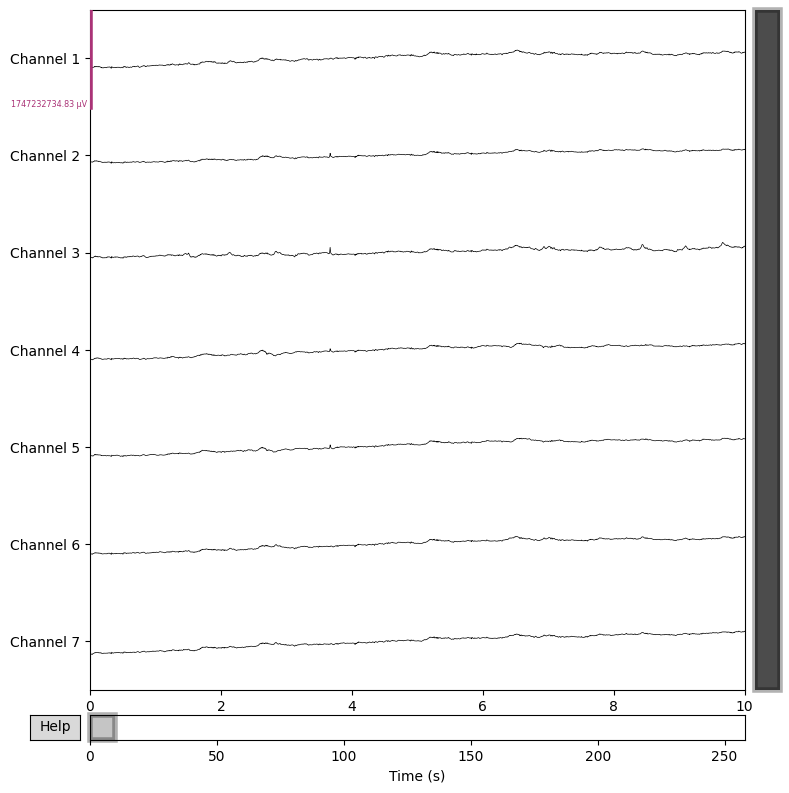

time: from 0:10 min until 0:20 min


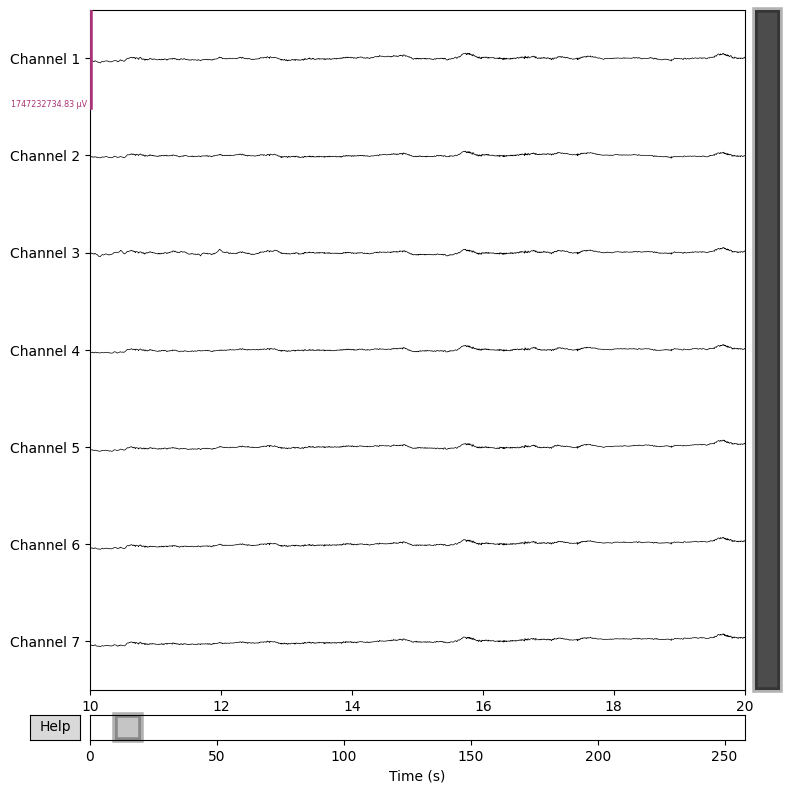

time: from 0:20 min until 0:30 min


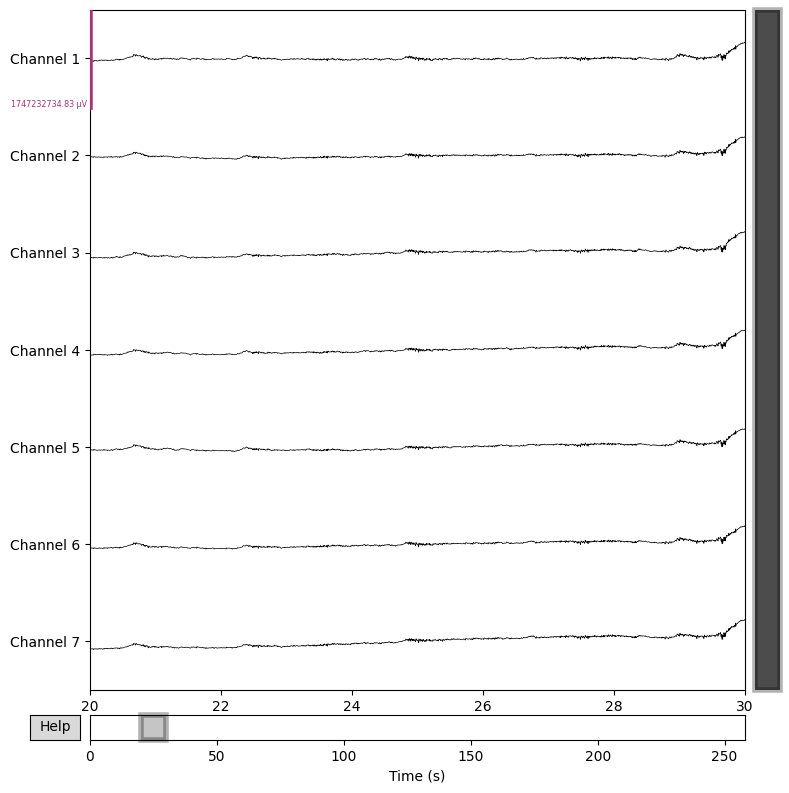

time: from 0:30 min until 0:40 min


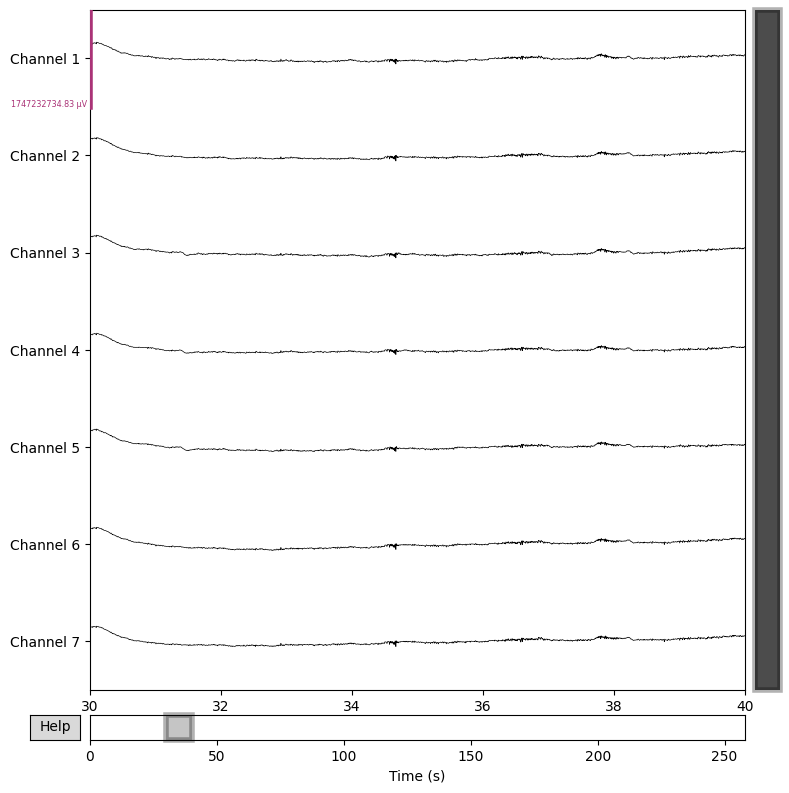

time: from 0:40 min until 0:50 min


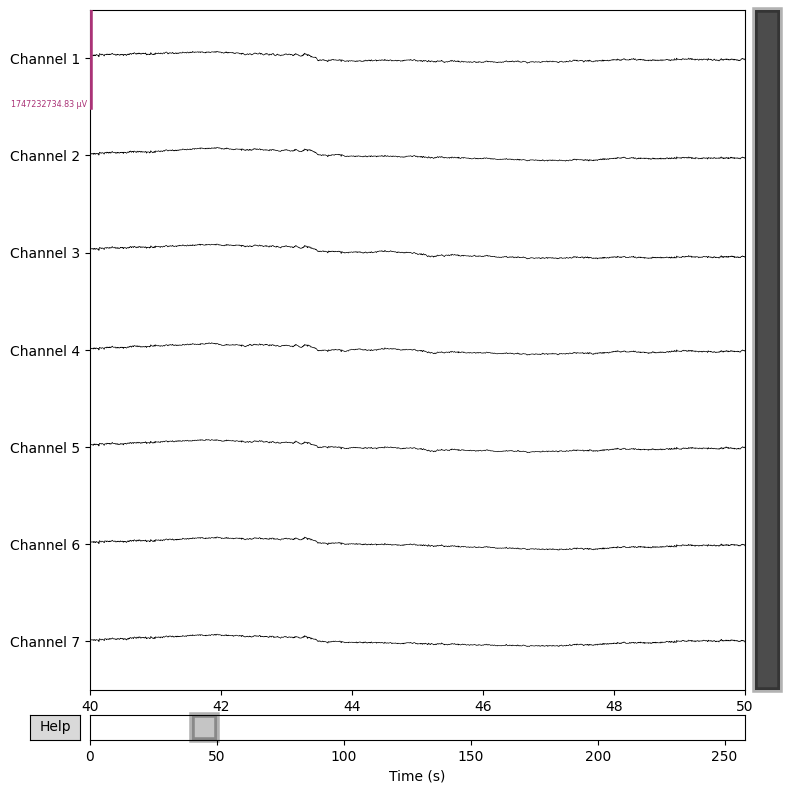

time: from 0:50 min until 1:0 min


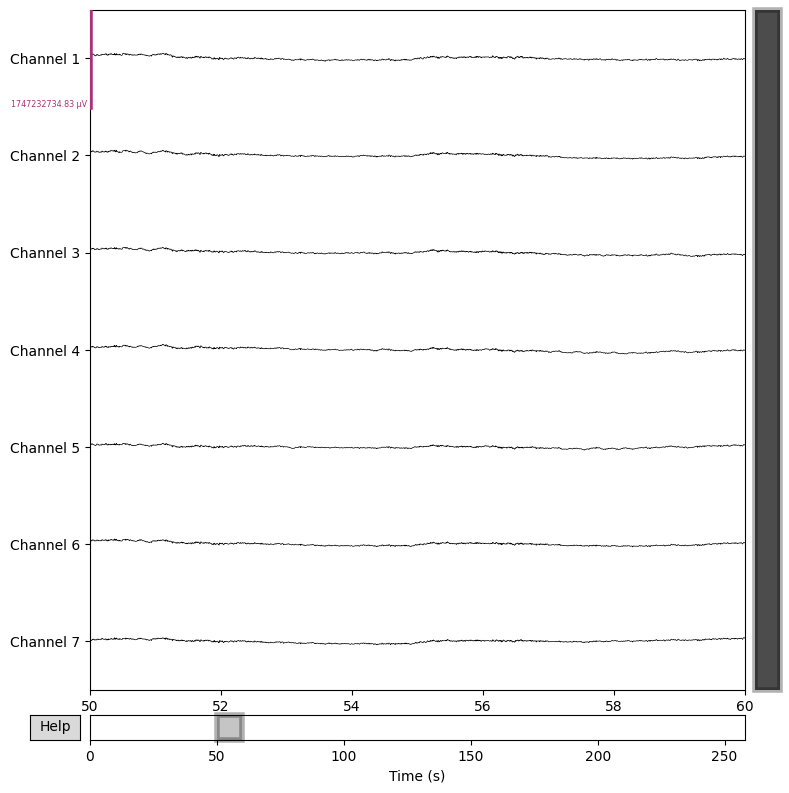

time: from 1:0 min until 1:10 min


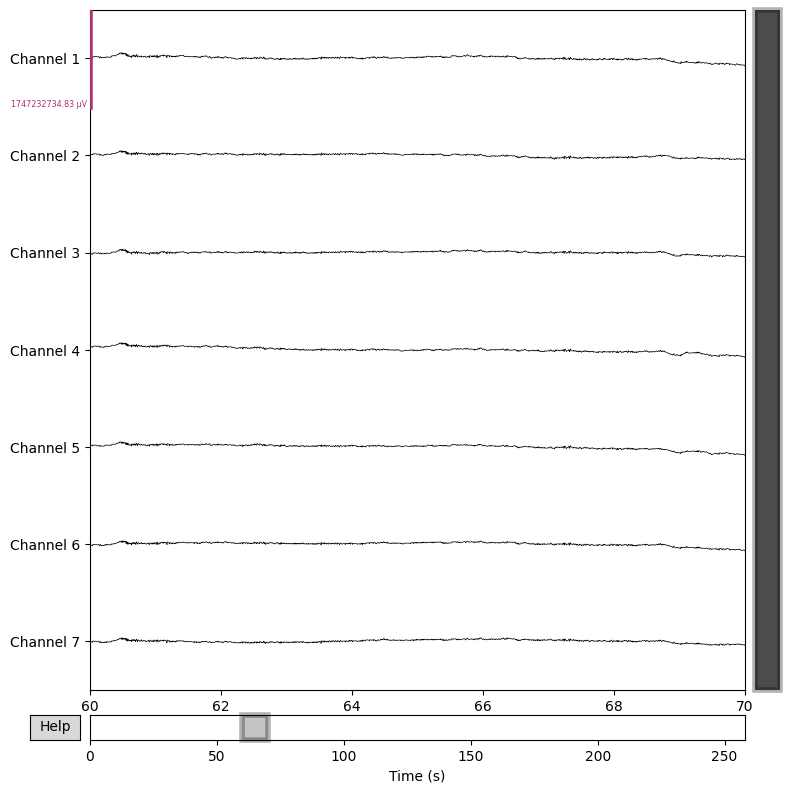

time: from 1:10 min until 1:20 min


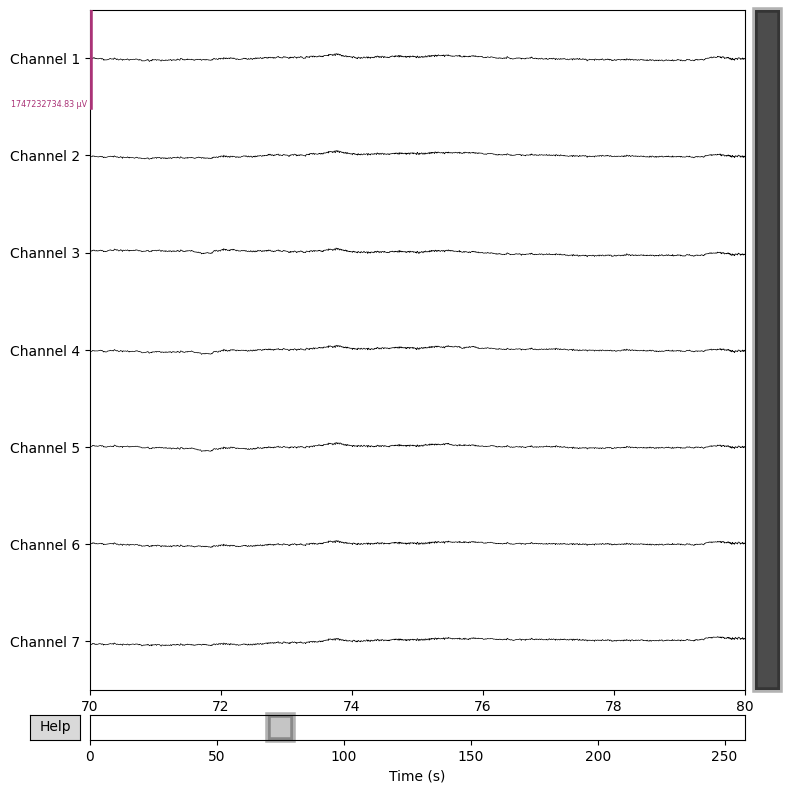

time: from 1:20 min until 1:30 min


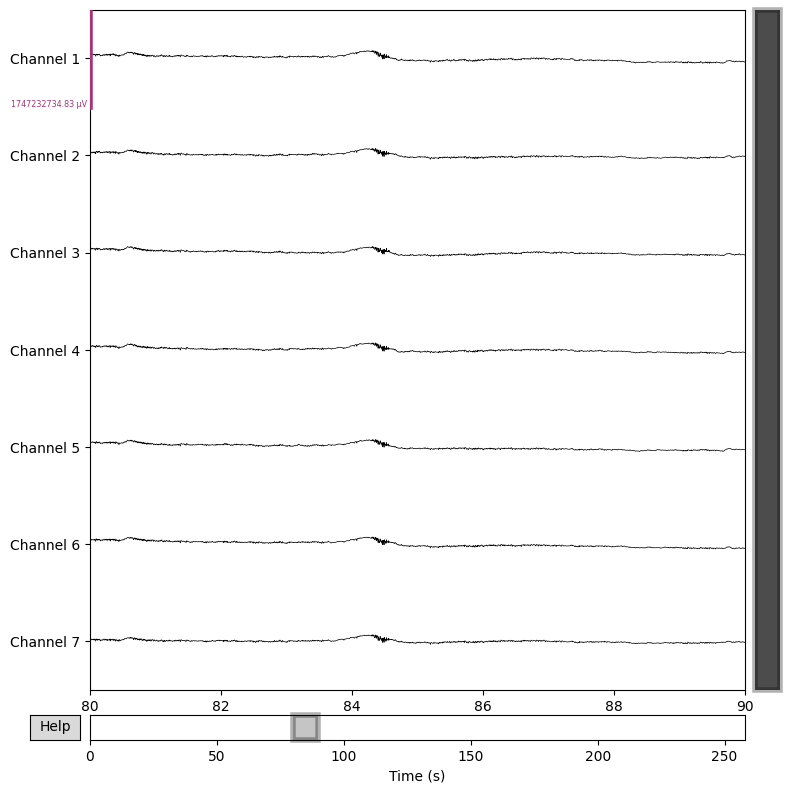

time: from 1:30 min until 1:40 min


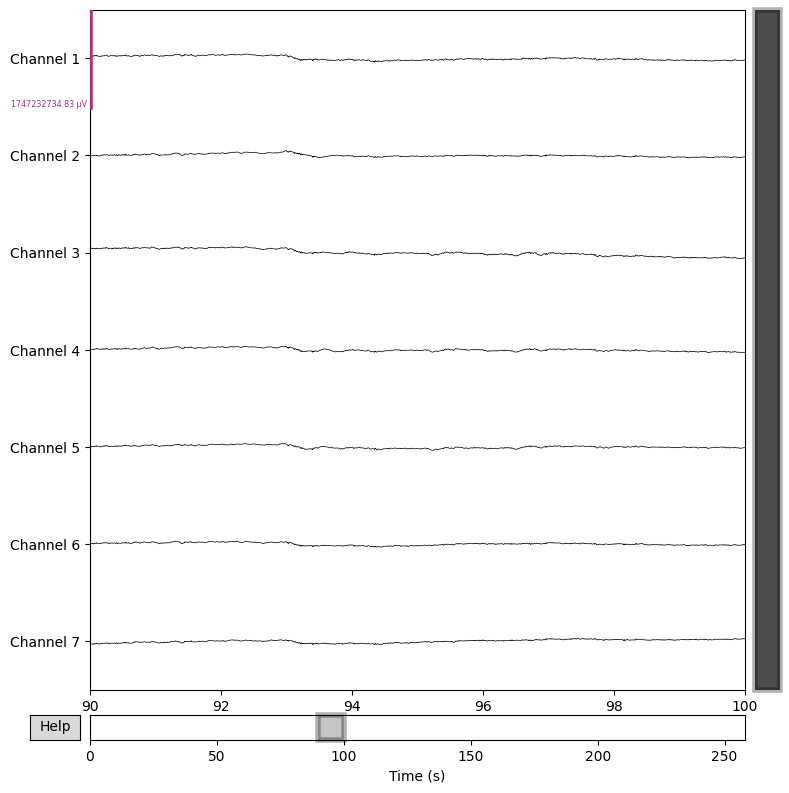

<Info | 7 non-empty values
 bads: []
 ch_names: Channel 1, Channel 2, Channel 3, Channel 4, Channel 5, Channel ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 7
 projs: []
 sfreq: 250.0 Hz
>


In [ ]:

#first data setup

first_text_file_path = '/content/feb_20_trial_3.txt'

df = pd.read_csv(first_text_file_path, delimiter=',', skiprows=5)
#df = pd.read_csv(text_file_path, index_col = False, sep=",", header= 0, skiprows = 5)

# Drop rows with missing values
#df = df.dropna()

# Extract EEG data
trial_data = df.iloc[:, 1:24].values

#print(trial_data[0:10][0:10])

sfreq = 250  # sample rate in Hz
ch_names = ['Channel {}'.format(i) for i in range(trial_data.shape[1])]
ch_types = ['eeg' for i in range(trial_data.shape[1])]

# Create info structures and RawArray objects for each set of data
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(trial_data.T, info)

ch_names = [raw.ch_names]
#print(ch_names)
first_ch_names_to_keep = [ch_names[0][1:8]]
raw = raw.pick_channels(first_ch_names_to_keep[0])


#raw.plot(start = 0, duration = 80, scalings='auto')
plotLoop(raw, 0, 100, 10, first_ch_names_to_keep[0])
print(raw.info)

#setup bad channels
#badChannels = first_ch_names_to_keep[0][1].split("-")
#badChannels += first_ch_names_to_keep[0][0].split("-")
#badChannels += first_ch_names_to_keep[0][4].split("-")
#badChannels = first_ch_names_to_keep[0][7].split("-")

In [ ]:


# Second data setup
second_text_file_path = '/content/JustinFocused2.txt'

# Read the CSV file
second_df = pd.read_csv(second_text_file_path, delimiter=',', skiprows=5)

# Drop rows with missing values (if needed)
# second_df = second_df.dropna()

# Extract EEG data
second_trial_data = second_df.iloc[:, 1:24].values

# Sample rate in Hz
second_sfreq = 250

# Create channel names and types
second_ch_names = ['Channel {}'.format(i) for i in range(second_trial_data.shape[1])]
second_ch_types = ['eeg' for _ in range(second_trial_data.shape[1])]

# Create info structure and RawArray object for the second dataset
second_info = mne.create_info(ch_names=second_ch_names, sfreq=second_sfreq, ch_types=second_ch_types)
second_raw = mne.io.RawArray(second_trial_data.T, second_info)

# Select channels to keep
second_ch_names_to_keep = second_raw.ch_names[1:8]
second_raw = second_raw.pick_channels(second_ch_names_to_keep)

second_bad_channels = second_ch_names_to_keep[1].split("-")
second_bad_channels += second_ch_names_to_keep[0].split("-")
second_bad_channels += second_ch_names_to_keep[4].split("-")
# fourth_bad_channels += fourth_ch_names_to_keep[7].split("-"

# Plot the data (if needed)
# second_raw.pl


In [ ]:

# Third data setup

third_text_file_path = '/content/JustinFocused3.txt'

# Read the CSV file
third_df = pd.read_csv(third_text_file_path, delimiter=',', skiprows=5)

# Drop rows with missing values (if needed)
# third_df = third_df.dropna()

# Extract EEG data
third_trial_data = third_df.iloc[:, 1:24].values

# Sample rate in Hz
third_sfreq = 250

# Create channel names and types
third_ch_names = ['Channel {}'.format(i) for i in range(third_trial_data.shape[1])]
third_ch_types = ['eeg' for _ in range(third_trial_data.shape[1])]

# Create info structure and RawArray object for the third dataset
third_info = mne.create_info(ch_names=third_ch_names, sfreq=third_sfreq, ch_types=third_ch_types)
third_raw = mne.io.RawArray(third_trial_data.T, third_info)

# Select channels to keep
third_ch_names_to_keep = third_raw.ch_names[1:8]
third_raw = third_raw.pick_channels(third_ch_names_to_keep)

# Plot the data (if needed)
# third_raw.plot(start=0, duration=600, scalings='auto')
# plotLoop(third_raw, 0, 600, 120, third_ch_names_to_keep)
print(third_raw.info)

# Setup bad channels
third_bad_channels = third_ch_names_to_keep[1].split("-")
third_bad_channels += third_ch_names_to_keep[0].split("-")
third_bad_channels += third_ch_names_to_keep[4].split("-")
# third_bad_channels += third_ch_names_to_keep[7].split("-")

# Print the bad channels for debugging
print("Bad channels:", third_bad_channels)


In [ ]:


# Fifth data setup
fifth_text_file_path = '/content/JustinUnfocused2.txt'

# Read the CSV file
fifth_df = pd.read_csv(fifth_text_file_path, delimiter=',', skiprows=5)

# Drop rows with missing values (if needed)
# fifth_df = fifth_df.dropna()

# Extract EEG data
fifth_trial_data = fifth_df.iloc[:, 1:24].values

# Sample rate in Hz
fifth_sfreq = 250

# Create channel names and types
fifth_ch_names = ['Channel {}'.format(i) for i in range(fifth_trial_data.shape[1])]
fifth_ch_types = ['eeg' for _ in range(fifth_trial_data.shape[1])]

# Create info structure and RawArray object for the fifth dataset
fifth_info = mne.create_info(ch_names=fifth_ch_names, sfreq=fifth_sfreq, ch_types=fifth_ch_types)
fifth_raw = mne.io.RawArray(fifth_trial_data.T, fifth_info)

# Select channels to keep
fifth_ch_names_to_keep = fifth_raw.ch_names[1:8]
fifth_raw = fifth_raw.pick_channels(fifth_ch_names_to_keep)

# Plot the data (if needed)
# fifth_raw.plot(start=0, duration=600, scalings='auto')
# plotLoop(fifth_raw, 0, 600, 120, fifth_ch_names_to_keep)
print(fifth_raw.info)

# Setup bad channels
fifth_bad_channels = fifth_ch_names_to_keep[1].split("-")
fifth_bad_channels += fifth_ch_names_to_keep[0].split("-")
fifth_bad_channels += fifth_ch_names_to_keep[4].split("-")
# fifth_bad_channels += fifth_ch_names_to_keep[7].split("-")

# Print the bad channels for debugging
print("Bad channels:", fifth_bad_channels)


In [ ]:


# Sixth data setup
sixth_text_file_path = '/content/JustinUnfocused3.txt'

# Read the CSV file
sixth_df = pd.read_csv(sixth_text_file_path, delimiter=',', skiprows=5)

# Drop rows with missing values (if needed)
# sixth_df = sixth_df.dropna()

# Extract EEG data
sixth_trial_data = sixth_df.iloc[:, 1:24].values

# Sample rate in Hz
sixth_sfreq = 250

# Create channel names and types
sixth_ch_names = ['Channel {}'.format(i) for i in range(sixth_trial_data.shape[1])]
sixth_ch_types = ['eeg' for _ in range(sixth_trial_data.shape[1])]

# Create info structure and RawArray object for the sixth dataset
sixth_info = mne.create_info(ch_names=sixth_ch_names, sfreq=sixth_sfreq, ch_types=sixth_ch_types)
sixth_raw = mne.io.RawArray(sixth_trial_data.T, sixth_info)

# Select channels to keep
sixth_ch_names_to_keep = sixth_raw.ch_names[1:8]
sixth_raw = sixth_raw.pick_channels(sixth_ch_names_to_keep)

# Plot the data (if needed)
# sixth_raw.plot(start=0, duration=600, scalings='auto')
# plotLoop(sixth_raw, 0, 600, 120, sixth_ch_names_to_keep)
print(sixth_raw.info)

# Setup bad channels
sixth_bad_channels = sixth_ch_names_to_keep[1].split("-")
sixth_bad_channels += sixth_ch_names_to_keep[0].split("-")
sixth_bad_channels += sixth_ch_names_to_keep[4].split("-")
# sixth_bad_channels += sixth_ch_names_to_keep[7].split("-")

# Print the bad channels for debugging
print("Bad channels:", sixth_bad_channels)


In [ ]:
import pandas as pd
import mne

# Fourth data setup
fourth_text_file_path = '/content/JustinUnfocused1.txt'

# Read the CSV file
fourth_df = pd.read_csv(fourth_text_file_path, delimiter=',', skiprows=5)

# Drop rows with missing values (if needed)
# fourth_df = fourth_df.dropna()

# Extract EEG data
fourth_trial_data = fourth_df.iloc[:, 1:24].values

# Sample rate in Hz
fourth_sfreq = 250

# Create channel names and types
fourth_ch_names = ['Channel {}'.format(i) for i in range(fourth_trial_data.shape[1])]
fourth_ch_types = ['eeg' for _ in range(fourth_trial_data.shape[1])]

# Create info structure and RawArray object for the fourth dataset
fourth_info = mne.create_info(ch_names=fourth_ch_names, sfreq=fourth_sfreq, ch_types=fourth_ch_types)
fourth_raw = mne.io.RawArray(fourth_trial_data.T, fourth_info)

# Select channels to keep
fourth_ch_names_to_keep = fourth_raw.ch_names[1:8]
fourth_raw = fourth_raw.pick_channels(fourth_ch_names_to_keep)

# Plot the data (if needed)
# fourth_raw.plot(start=0, duration=600, scalings='auto')
# plotLoop(fourth_raw, 0, 600, 120, fourth_ch_names_to_keep)
print(fourth_raw.info)

# Setup bad channels
fourth_bad_channels = fourth_ch_names_to_keep[1].split("-")
fourth_bad_channels += fourth_ch_names_to_keep[0].split("-")
fourth_bad_channels += fourth_ch_names_to_keep[4].split("-")
# fourth_bad_channels += fourth_ch_names_to_keep[7].split("-")


# Print the bad channels for debugging
print("Bad channels:", fourth_bad_channels)


In [ ]:
#repurposing openbci gui focus model code for our needs:

#model init:
def initBrainFlowModel() :
  modelParams = BrainFlowModelParams( BrainFlowMetrics.MINDFULNESS, BrainFlowClassifiers.DEFAULT_CLASSIFIER)
  mlModel = MLModel(modelParams)
  try :
    mlModel.prepare()
  except Exception as ex:
    print(ex)
  return mlModel

'''
  # this function makes a call to calculate average band powers and uses the powers to classify focus
  # @args:
  ## dataIndex: index to start analyzing data at
  ## data: eeg data to be analyzed
  ## channelCount: number of valid channels
  ## sampleRate: board sample rate
  ## seconds: window size in seconds
  ## threshold: confidence threshold for classification
'''
def updateFocusState(dataIndex, data, mlModel, channelCount = 8, sampleRate = 250, seconds = 5, threshold = 0.2) :
  print("data: " + str(data[0]))
  try :
    windowSize = sampleRate * seconds #250 samples * 5 seconds
    # getData in GUI returns data in shape ndatapoints x nchannels, in BrainFlow its transposed

    dataArray = []
    for i in range(channelCount) :
      dataArray.append(data[i][int(dataIndex - (windowSize)) + 1: dataIndex])

    tempArr = np.array(dataArray)
    print("temp: " + str(tempArr))

    bands = DataFilter.get_avg_band_powers (tempArr, range(channelCount), sampleRate, True)
    featureVector = bands[0]
    print("bands: \n" + str(bands[0]))

    #Left array is Averages, right array is Standard Deviations. Update values using Averages.
    #print("band powers: " + str(featureVector))

    #Keep this here
    prediction = mlModel.predict(featureVector)
    print("prediction: " + str(prediction))

    del bands

    return prediction

  except Exception as ex:
    print("exception")
    print(ex)


#clean up
def endSession(mlModel) :
  try :
    mlModel.release()
  except Exception as ex :
    print(ex)


In [ ]:
#fix data format
#print(len(raw[6][0][0]))
logicalArr = []
for chan in range(len(first_ch_names_to_keep[0])):
  print(chan)
  logicalArr.append(raw[chan][0][0])
print(logicalArr)

In [ ]:

#preparing data to get average bands

logicalArr = []
for chan in range(len(first_ch_names_to_keep[0])):
  print(chan)
  logicalArr.append(raw[chan][0][0][250 * 300:len(raw[chan][0][0])])
print(logicalArr)

second_logicalArr = []
for second_chan in range(len(first_ch_names_to_keep[0])):
  print(second_chan)
  second_logicalArr.append(second_raw[second_chan][0][0][250 * 300:len(second_raw[second_chan][0][0])])
print(second_logicalArr)

third_logicalArr = []
for third_chan in range(len(first_ch_names_to_keep[0])):
    print(third_chan)
    third_logicalArr.append(third_raw[third_chan][0][0][250 * 300:len(third_raw[third_chan][0][0])])
print(third_logicalArr)

fourth_logicalArr = []
for fourth_chan in range(len(first_ch_names_to_keep[0])):
    print(fourth_chan)
    fourth_logicalArr.append(fourth_raw[fourth_chan][0][0])
print(fourth_logicalArr)

fifth_logicalArr = []
for fifth_chan in range(len(first_ch_names_to_keep[0])):
    print(fifth_chan)
    fifth_logicalArr.append(fifth_raw[fifth_chan][0][0])
print(fifth_logicalArr)

sixth_logicalArr = []
for sixth_chan in range(len(first_ch_names_to_keep[0])):
    print(sixth_chan)
    sixth_logicalArr.append(sixth_raw[sixth_chan][0][0])
print(sixth_logicalArr)


In [ ]:
#fix data format
logicalArr = []
for chan in range(len(first_ch_names_to_keep[0])):
  print(chan)
  logicalArr.append(raw[chan][0][0][250 * 300:len(raw[chan][0][0])])




In [ ]:
print("\nFocused:")

tempArr = np.array(logicalArr)

bands = DataFilter.get_avg_band_powers(tempArr, range(7), 250, True)
print(bands[0])


# testing
second_tempArr = np.array(second_logicalArr)

second_bands = DataFilter.get_avg_band_powers(second_tempArr, range(7), 250, True)
print(second_bands[0])


# testing
third_tempArr = np.array(third_logicalArr)

third_bands = DataFilter.get_avg_band_powers(third_tempArr, range(7), 250, True)
print(third_bands[0])


print("\nUnfocused:")
# testing
fourth_tempArr = np.array(fourth_logicalArr)

fourth_bands = DataFilter.get_avg_band_powers(fourth_tempArr, range(7), 250, True)
print(fourth_bands[0])


# testing
fifth_tempArr = np.array(fifth_logicalArr)

fifth_bands = DataFilter.get_avg_band_powers(fifth_tempArr, range(7), 250, True)
print(fifth_bands[0])


# testing
sixth_tempArr = np.array(sixth_logicalArr)

sixth_bands = DataFilter.get_avg_band_powers(sixth_tempArr, range(7), 250, True)
print(sixth_bands[0])


In [ ]:
#testing
tempArr = np.array(logicalArr)
print(len(tempArr[0]))
print(tempArr[250 * 300:len(tempArr) - 1])

bands = DataFilter.get_avg_band_powers (tempArr[250 * 300:len(tempArr) - 1], range(7), 250, True)
print(bands[0])

In [ ]:
#setup Model
mlModel = initBrainFlowModel()

#loop for predictions
windowSize = 5 #seconds
for sample in range(int((len(logicalArr[0]) - (windowSize * 250)) / 250)):
  dataIndex = (sample + windowSize) * 250
  currPrediction = updateFocusState(dataIndex, logicalArr, mlModel, channelCount = len(first_ch_names_to_keep[0]))
  if (currPrediction[0] > 0.5):
    print(".  " +str(math.floor((sample + windowSize) / 60)) + ":" + str((sample + windowSize) % 60) + " Focused: " + str(currPrediction))
    #print("Focused:\n")
    #print("Prediction for " + str(math.floor((sample + windowSize) / 60)) + ":" + str((sample + windowSize) % 60) + " is " + str(currPrediction) + "\n")
  else:
    print(str(math.floor((sample + windowSize) / 60)) + ":" + str((sample + windowSize) % 60) + " Unfocused: " + str(currPrediction))
#for window in range(int((len(logicalArr[0]) / 250) / windowSize)):

#end session
endSession(mlModel)

In [ ]:
#machine learning imports
import sklearn
from sklearn.model_selection import train_test_split


In [ ]:
#check data train test split format
print(ch_names[0][0:3])

print(short2)
features = [[short1], [short2]]
labels = [1, 1]
print(dataArray[1][0][3])
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(X_train)
print(y_train)
#x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_(dataArray, labels, random_state=42, train_size = .5)
